## Import modules

In [1]:
import mlrose_hiive
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import warnings
from IPython.display import display
import IPython.display as ipd

random_seed = 56

In [2]:
# plot setting fix
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
matplotlib.rcParams.update({'font.size': 15})

# notification of completing the code

sound = []
def SoundNotification():
    global sound
    sr = 22050 # sample rate
    T = 90    # seconds
    t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
    x = 0.5*numpy.sin(2*numpy.pi*1000*t)              # pure sine wave at 440 Hz
    sound = ipd.Audio(x, rate=sr, autoplay=True) # load a NumPy array

    return sound

def done():    
    sound = SoundNotification()
    return sound

## Define a Fitness Function Object

In [3]:
# This function is copied from MLRose Tutorial
# https://mlrose.readthedocs.io/en/stable/source/tutorial1.html  
size_Q = 16
def queeens_max(board):
    count = 0
    length = len(board)
    for i in range(0, length - 1):
        for j in range(i + 1, length):
            # calculate attahcing pairs
            distance = j - i
            if (board[j] != board[i]) and (board[j] != board[i] + distance) and (board[j] != board[i] - distance):
                # no attack
                count +=1

    return count
# we are dealing with a maximize problem
customized_fitness = mlrose_hiive.CustomFitness(queeens_max)
print(customized_fitness)

In [4]:
# calculate the theoretical numnber
max_number = 0
for i in range(0, size_Q):
    max_number += i
print(max_number)

120


## Define an optimization problem object

In [5]:
# DiscreteOpt() 
# ContinuousOpt()
# TSPOpt()
# DiscreteOpt() takes integers in range 0 to max_val-1
problem = mlrose_hiive.DiscreteOpt(length = size_Q, fitness_fn = customized_fitness, 
                             maximize = True, max_val = size_Q)

attemp_min = 10
attemp_max = 120
attemp_step = 45

### Initiation test on all 4 algorithms

In [6]:
all_result = []
for attemp in range(attemp_min, attemp_max, attemp_step):
    # RHC
    start_time = time.time()
    first_RHC_state, first_RHC_fitness, RHC_curve_vals = mlrose_hiive.random_hill_climb(problem, 
                                            max_attempts = attemp ,curve = True, random_state = random_seed)
    end_time = time.time()
    running_time = end_time - start_time
    all_result.append(["RHC", attemp, int(first_RHC_fitness),first_RHC_state, len(RHC_curve_vals), RHC_curve_vals, running_time])

    # Simulated annealing (SA)
    start_time = time.time()
    first_SA_state, first_SA_fitness, SA_curve_vals = mlrose_hiive.simulated_annealing(problem, 
                                            max_attempts = attemp ,curve = True, random_state = random_seed)
    end_time = time.time()
    running_time = end_time - start_time
    all_result.append(["SA", attemp, int(first_SA_fitness),first_SA_state, len(SA_curve_vals), SA_curve_vals, running_time])

    # Genetic algorithm (GA)
    start_time = time.time()
    first_GA_state, first_GA_fitness, GA_curve_vals = mlrose_hiive.genetic_alg(problem, 
                                            max_attempts = attemp ,curve = True, random_state = random_seed)
    end_time = time.time()
    running_time = end_time - start_time
    all_result.append(["GA", attemp, int(first_GA_fitness),first_GA_state, len(GA_curve_vals), GA_curve_vals, running_time])
    
    # MIMIC
    start_time = time.time()
    first_MIMIC_state, first_MIMIC_fitness, MIMIC_curve_vals = mlrose_hiive.mimic(problem, 
                                            max_attempts = attemp ,curve = True, random_state = random_seed)
    end_time = time.time()
    running_time = end_time - start_time
    all_result.append(["MIMIC", attemp, int(first_MIMIC_fitness),first_MIMIC_state, len(MIMIC_curve_vals), MIMIC_curve_vals, running_time])
    
    print("the running progress is: " + str(int(attemp / attemp_max * 100)) + "%", end = "\r")

    


In [7]:
# converted into pandas dataframe
all_pandas = pd.DataFrame(all_result, columns=['Algorithm', 'Max attempts', 'Best fitness', 'Best states', 'Iterations', 'Fitness details', 'Running time'])

In [8]:
# sort the result based on the fitness, get the top 10 peroformance of algorithm
all_pandas.sort_values(["Best fitness", "Iterations"], ascending = [False, True]).head(n = 10)

,Algorithm,Max attempts,Best fitness,Best states,Iterations,Fitness details,Running time
6,GA,55,119,"[0, 5, 15, 11, 6, 14, 2, 8, 15, 12, 3, 1, 4, 7...",115,"[112.0, 112.0, 112.0, 112.0, 114.0, 114.0, 114...",4.830890
10,GA,100,119,"[0, 5, 15, 11, 6, 14, 2, 8, 15, 12, 3, 1, 4, 7...",160,"[112.0, 112.0, 112.0, 112.0, 114.0, 114.0, 114...",7.857562
5,SA,55,119,"[5, 2, 14, 12, 4, 13, 5, 3, 11, 15, 7, 1, 10, ...",888,"[101.0, 99.0, 99.0, 100.0, 103.0, 107.0, 110.0...",0.192578
9,SA,100,119,"[14, 2, 7, 12, 4, 13, 5, 3, 11, 15, 7, 1, 10, ...",1434,"[101.0, 99.0, 99.0, 100.0, 103.0, 107.0, 110.0...",0.296893
3,MIMIC,10,116,"[15, 12, 7, 9, 0, 13, 5, 14, 8, 1, 12, 2, 10, ...",14,"[112.0, 113.0, 113.0, 116.0, 116.0, 116.0, 116...",2.194959
7,MIMIC,55,116,"[15, 12, 7, 9, 0, 13, 5, 14, 8, 1, 12, 2, 10, ...",59,"[112.0, 113.0, 113.0, 116.0, 116.0, 116.0, 116...",8.863971
11,MIMIC,100,116,"[15, 12, 7, 9, 0, 13, 5, 14, 8, 1, 12, 2, 10, ...",104,"[112.0, 113.0, 113.0, 116.0, 116.0, 116.0, 116...",17.372140
4,RHC,55,116,"[5, 4, 15, 15, 2, 6, 10, 14, 8, 11, 7, 3, 0, 1...",151,"[101.0, 103.0, 103.0, 105.0, 106.0, 108.0, 108...",0.030927
8,RHC,100,116,"[5, 4, 15, 15, 2, 6, 10, 14, 8, 11, 7, 3, 0, 1...",196,"[101.0, 103.0, 103.0, 105.0, 106.0, 108.0, 108...",0.041696
2,GA,10,114,"[4, 6, 12, 14, 9, 3, 12, 8, 15, 0, 2, 4, 9, 13...",15,"[112.0, 112.0, 112.0, 112.0, 114.0, 114.0, 114...",0.647449


### performance comparison

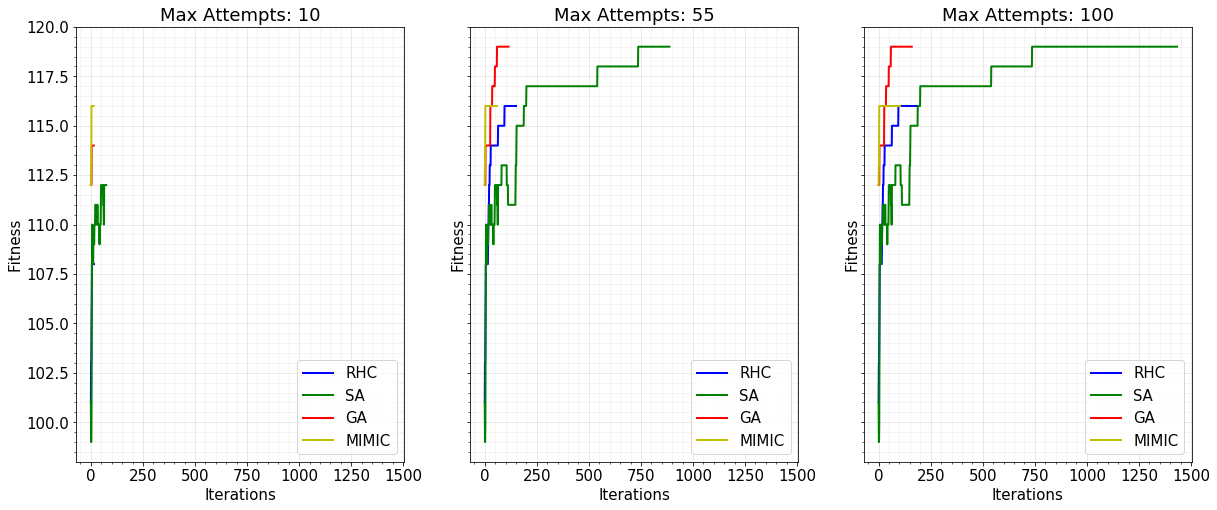

In [71]:
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgryckm')

fig, axis = plt.subplots(1,3, figsize=(20, 8), sharex=True, sharey=True)
axis_ravel = axis.ravel()
for ax, max_attemps in zip(axis_ravel, range(attemp_min, attemp_max, attemp_step)):
    attemps = all_pandas[all_pandas['Max attempts']== max_attemps]
    for i in range(0, attemps.shape[0]):
        ax.plot(attemps.iloc[i]['Fitness details'], label = attemps.iloc[i]['Algorithm'], linewidth=2)
        ax.set_title('Max Attempts: '+str(max_attemps))
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Fitness')
        ax.minorticks_on()
        ax.legend(loc='lower right')
        ax.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
        ax.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
fig.savefig("N_Queens_initial.png")

### time comparison

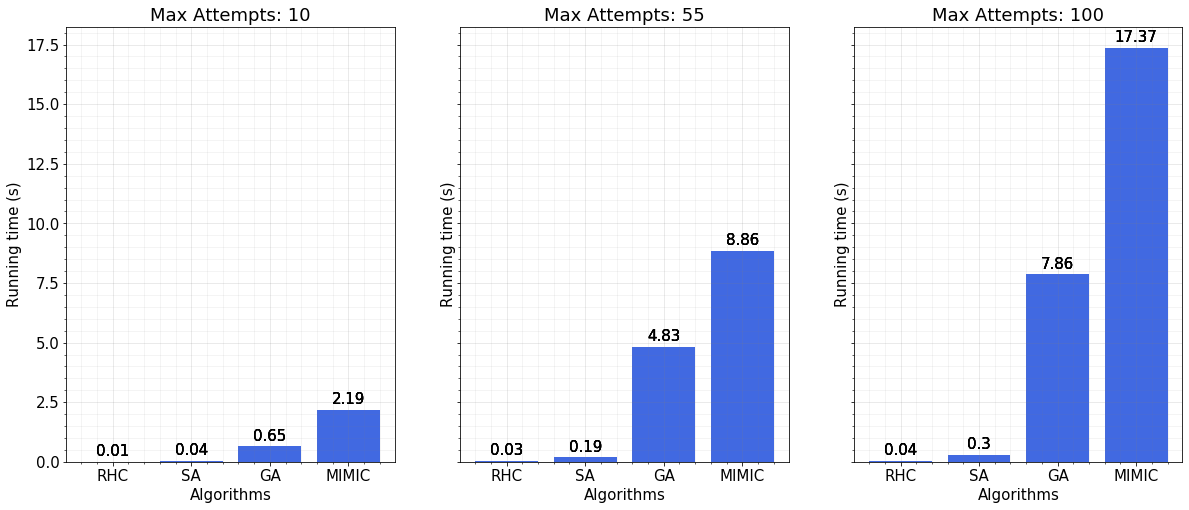

In [24]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
fig, axis = plt.subplots(1,3, figsize=(20, 8), sharex=True, sharey=True)

axis_ravel = axis.ravel()
for ax, max_attemps in zip(axis_ravel, range(attemp_min, attemp_max, attemp_step)):
    attemps = all_pandas[all_pandas['Max attempts']== max_attemps]
    for i in range(0, attemps.shape[0]):
        runtime = [round(num, 2) for num in attemps['Running time']]
        rects = ax.bar(attemps['Algorithm'],runtime, linewidth=2, color = "royalblue")
        ax.set_title('Max Attempts: '+str(max_attemps))
        ax.set_xlabel('Algorithms')
        ax.set_ylabel('Running time (s)')
#         ax.set_yscale('log')
        ax.minorticks_on()
#         ax.legend(loc='lower right')
        ax.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
        ax.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
        autolabel(rects)
fig.savefig("N_Queens_initia_time.png")

# Optimization using hyper parameter tuning

In [81]:
all_max_attemps = 55

### Random Hill climbing

In [82]:
# random_hill_climb(problem, max_attempts=10, max_iters=inf, restarts=0, init_state=None,
# curve=False, random_state=None)

# set the max attemps to 55, max iteration to inf, init_state = None, curve = true, random seed = 56
# restart is the variable
restart_min = 0
restart_max = 11
restart_candidates = range(restart_min, restart_max, 2)
opt_RHC_restart = []
for restart_times in restart_candidates:
    RHC_state, RHC_fitness, RHC_curves = mlrose_hiive.random_hill_climb(problem, max_attempts = all_max_attemps,
                                        max_iters = np.inf, restarts =  restart_times, init_state = None,
                                        curve = True, random_state = random_seed)

    opt_RHC_restart.append(["RHC", RHC_fitness, RHC_state, restart_times, len(RHC_curves), RHC_curves])
    print("the running progress is: " + str(int(restart_times / restart_max* 100)) + "%", end = "\r")
    
pd_RHC_restart = pd.DataFrame(opt_RHC_restart, columns=['Algorithm', 'Best fitness', 'Best state',
                                                        'Restarts', 'Iterations', 'Fitness'])    

In [83]:
pd_RHC_restart

,Algorithm,Best fitness,Best state,Restarts,Iterations,Fitness
0,RHC,116.0,"[5, 4, 15, 15, 2, 6, 10, 14, 8, 11, 7, 3, 0, 1...",0,151,"[101.0, 103.0, 103.0, 105.0, 106.0, 108.0, 108..."
1,RHC,117.0,"[12, 2, 6, 11, 1, 4, 9, 14, 13, 11, 3, 0, 7, 5...",2,140,"[104.0, 104.0, 104.0, 104.0, 104.0, 104.0, 104..."
2,RHC,117.0,"[12, 2, 6, 11, 1, 4, 9, 14, 13, 11, 3, 0, 7, 5...",4,140,"[104.0, 104.0, 104.0, 104.0, 104.0, 104.0, 104..."
3,RHC,117.0,"[12, 2, 6, 11, 1, 4, 9, 14, 13, 11, 3, 0, 7, 5...",6,140,"[104.0, 104.0, 104.0, 104.0, 104.0, 104.0, 104..."
4,RHC,117.0,"[12, 2, 6, 11, 1, 4, 9, 14, 13, 11, 3, 0, 7, 5...",8,140,"[104.0, 104.0, 104.0, 104.0, 104.0, 104.0, 104..."
5,RHC,117.0,"[12, 2, 6, 11, 1, 4, 9, 14, 13, 11, 3, 0, 7, 5...",10,140,"[104.0, 104.0, 104.0, 104.0, 104.0, 104.0, 104..."


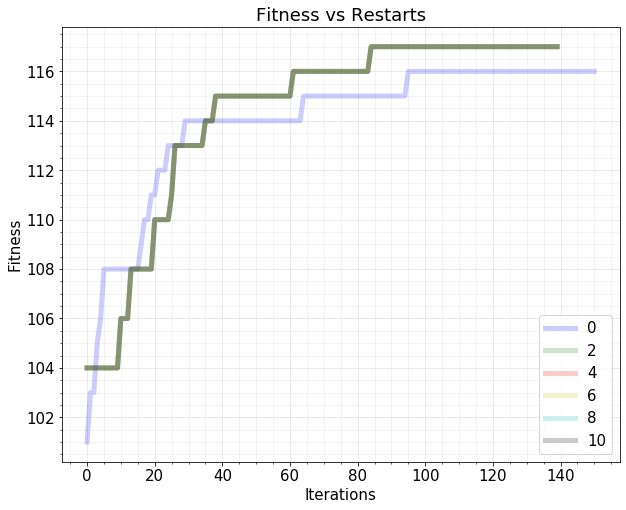

In [85]:
length = pd_RHC_restart.shape[0]
for i in range(0, length):
    plt.plot(pd_RHC_restart.iloc[i]['Fitness'],
             label=pd_RHC_restart.iloc[i]['Restarts'], alpha=0.2, linewidth = 5)
    plt.title('Fitness vs Restarts')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend(loc='lower right')
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
    plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
    
plt.savefig("N_Queens_opt_RHC.png")
plt.show()

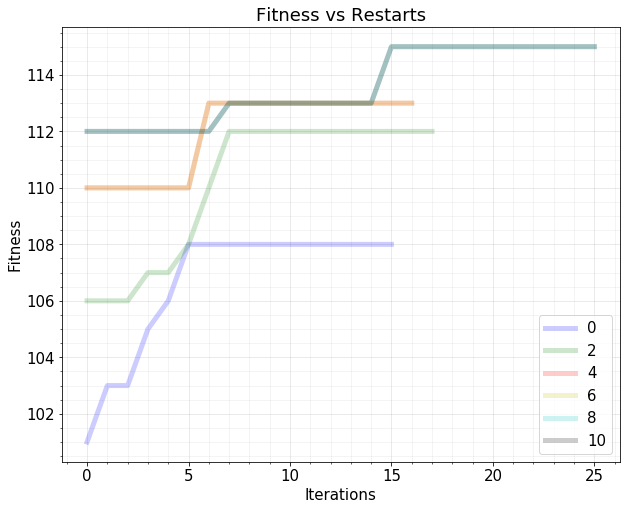

In [86]:
all_max_attemps = 10
restart_min = 0
restart_max = 11
restart_candidates = range(restart_min, restart_max, 2)
opt_RHC_restart = []
for restart_times in restart_candidates:
    RHC_state, RHC_fitness, RHC_curves = mlrose_hiive.random_hill_climb(problem, max_attempts = all_max_attemps,
                                        max_iters = np.inf, restarts =  restart_times, init_state = None,
                                        curve = True, random_state = random_seed)

    opt_RHC_restart.append(["RHC", RHC_fitness, RHC_state, restart_times, len(RHC_curves), RHC_curves])
    print("the running progress is: " + str(int(restart_times / restart_max* 100)) + "%", end = "\r")
    
pd_RHC_restart = pd.DataFrame(opt_RHC_restart, columns=['Algorithm', 'Best fitness', 'Best state',
                                                        'Restarts', 'Iterations', 'Fitness'])    
length = pd_RHC_restart.shape[0]
for i in range(0, length):
    plt.plot(pd_RHC_restart.iloc[i]['Fitness'],
             label=pd_RHC_restart.iloc[i]['Restarts'], alpha=0.2, linewidth = 5)
    plt.title('Fitness vs Restarts')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend(loc='lower right')
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
    plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
    
plt.savefig("N_Queens_opt_RHC_10attmps.png")
plt.show()

### Simulated annealing

In [89]:
# simulated_annealing(problem, schedule=<mlrose.decay.GeomDecay object>, max_attempts=10,
# max_iters=inf, init_state=None, curve=False, random_state=None)

# set the max attemps to 55, max iteration to inf, init_state = None, curve = true, random seed = 56
# class of decay is the variable
# ---------------------- options of decay ----------------------
# class ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001)
# class ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
# class GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)

all_max_attemps = 55

exp_decay = mlrose_hiive.ExpDecay()
arith_decay = mlrose_hiive.ArithDecay()
geo_decay = mlrose_hiive.GeomDecay()

opt_SA_decay = []
# exp
SA_state, SA_fitness, SA_curves = mlrose_hiive.simulated_annealing(problem,schedule = exp_decay,
                                    max_attempts = all_max_attemps,
                                    max_iters = np.inf, init_state = None,
                                    curve = True, random_state = random_seed)
opt_SA_decay.append(["SA", SA_fitness, SA_state, "exp_decay", len(SA_curves), SA_curves])

# arith
SA_state, SA_fitness, SA_curves = mlrose_hiive.simulated_annealing(problem,schedule = arith_decay,
                                    max_attempts = all_max_attemps,
                                    max_iters = np.inf, init_state = None,
                                    curve = True, random_state = random_seed)
opt_SA_decay.append(["SA", SA_fitness, SA_state, "arith_decay", len(SA_curves), SA_curves])

# geo
SA_state, SA_fitness, SA_curves = mlrose_hiive.simulated_annealing(problem,schedule = geo_decay,
                                    max_attempts = all_max_attemps,
                                    max_iters = np.inf, init_state = None,
                                    curve = True, random_state = random_seed)
opt_SA_decay.append(["SA", SA_fitness, SA_state, "geo_decay", len(SA_curves), SA_curves])


    
pd_SA_decay = pd.DataFrame(opt_SA_decay, columns=['Algorithm', 'Best fitness', 'Best state',
                                                        'Decay func', 'Iterations', 'Fitness'])    

In [90]:
pd_SA_decay

,Algorithm,Best fitness,Best state,Decay func,Iterations,Fitness
0,SA,118.0,"[1, 3, 15, 9, 14, 5, 13, 6, 12, 0, 4, 0, 15, 1...",exp_decay,811,"[101.0, 99.0, 99.0, 100.0, 103.0, 107.0, 110.0..."
1,SA,119.0,"[7, 4, 0, 9, 13, 5, 14, 11, 1, 10, 15, 3, 14, ...",arith_decay,7464,"[101.0, 99.0, 99.0, 100.0, 103.0, 107.0, 110.0..."
2,SA,119.0,"[5, 2, 14, 12, 4, 13, 5, 3, 11, 15, 7, 1, 10, ...",geo_decay,888,"[101.0, 99.0, 99.0, 100.0, 103.0, 107.0, 110.0..."


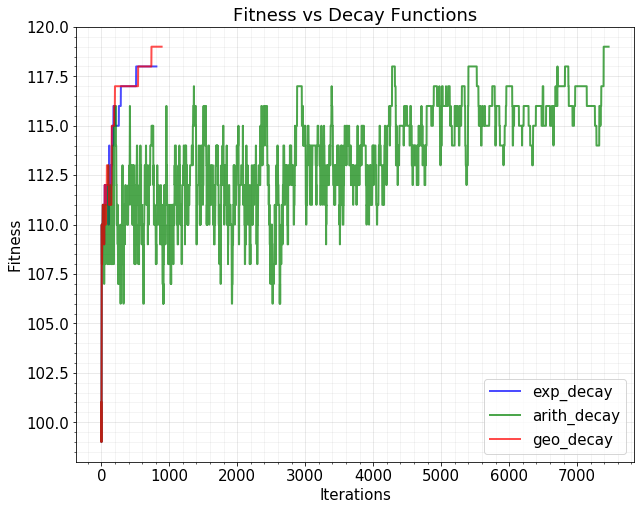

In [93]:
length = pd_SA_decay.shape[0]
for i in range(0, length):
    plt.plot(pd_SA_decay.iloc[i]['Fitness'],
             label=pd_SA_decay.iloc[i]['Decay func'], alpha=0.7, linewidth = 2)
    plt.title('Fitness vs Decay Functions')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend(loc='lower right')
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
    plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
    
plt.savefig("N_Queens_opt_SA_decay.png")
plt.show()

### Genetic Algorithm

#### pop size optimization

In [113]:
# genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=10, max_iters=inf, curve=False,
# random_state=None)

# set the max attemps to 55, max iteration to inf, init_state = None, curve = true, random seed = 56
# pop size is the variable
all_max_attemps = 55
pop_candidates = [50, 100, 200, 250, 500]
opt_GA_pop = []
for pop in pop_candidates:
    GA_state, GA_fitness, GA_curves = mlrose_hiive.genetic_alg(problem, pop_size = pop, mutation_prob = 0.1,
                                        max_attempts = all_max_attemps, max_iters = np.inf,
                                        curve = True, random_state = random_seed)

    opt_GA_pop.append(["GA", GA_fitness, GA_state, pop, len(GA_curves), GA_curves])
#     print("the running progress is: " + str(int(pop / pop_max * 100)) + "%", end = "\r")
    
pd_GA_pop = pd.DataFrame(opt_GA_pop, columns=['Algorithm', 'Best fitness', 'Best state',
                                             'Pop size', 'Iterations', 'Fitness'])  


In [114]:
pd_GA_pop

,Algorithm,Best fitness,Best state,Pop size,Iterations,Fitness
0,GA,118.0,"[9, 14, 0, 3, 7, 11, 1, 6, 12, 10, 2, 13, 6, 4...",50,132,"[112.0, 112.0, 112.0, 112.0, 112.0, 112.0, 112..."
1,GA,119.0,"[4, 8, 0, 9, 12, 14, 5, 10, 13, 6, 3, 11, 2, 7...",100,113,"[112.0, 112.0, 112.0, 113.0, 113.0, 113.0, 113..."
2,GA,119.0,"[0, 5, 15, 11, 6, 14, 2, 8, 15, 12, 3, 1, 4, 7...",200,115,"[112.0, 112.0, 112.0, 112.0, 114.0, 114.0, 114..."
3,GA,119.0,"[11, 2, 0, 12, 3, 7, 13, 15, 8, 1, 4, 14, 5, 0...",250,138,"[112.0, 112.0, 112.0, 113.0, 113.0, 114.0, 114..."
4,GA,120.0,"[6, 8, 5, 1, 14, 7, 2, 15, 12, 10, 3, 0, 4, 13...",500,152,"[113.0, 113.0, 113.0, 113.0, 113.0, 113.0, 113..."


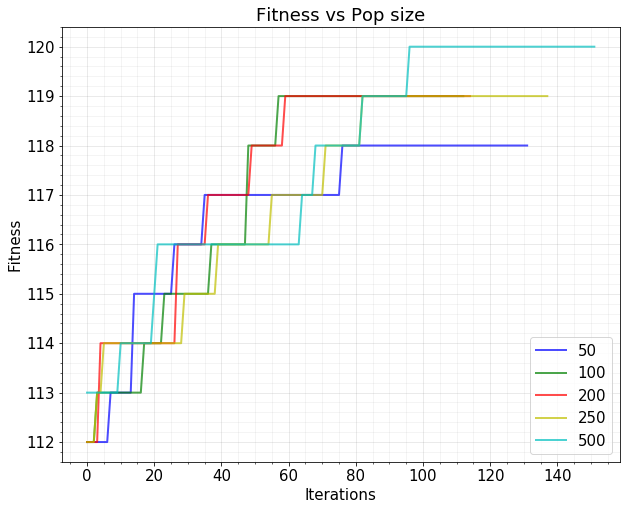

In [115]:
length = pd_GA_pop.shape[0]
for i in range(0, length):
    plt.plot(pd_GA_pop.iloc[i]['Fitness'],
             label= pd_GA_pop.iloc[i]['Pop size'], alpha=0.7, linewidth = 2)
    plt.title('Fitness vs Pop size')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend(loc='lower right')
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
    plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
    
plt.savefig("N_Queens_opt_GA_popsize.png")
plt.show()

#### mutation prob opt

In [119]:
# genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=10, max_iters=inf, curve=False,
# random_state=None)

# set the max attemps to 55, max iteration to inf, init_state = None, curve = true, random seed = 56
# mutation prob is the variable
all_max_attemps = 55
mutation_list = [0.01, 0.05, 0.1, 0.25, 0.5]
opt_GA_mutation_prob = []
for mutation in mutation_list:
    GA_state, GA_fitness, GA_curves = mlrose_hiive.genetic_alg(problem, pop_size = 200, mutation_prob = mutation,
                                        max_attempts = all_max_attemps, max_iters = np.inf,
                                        curve = True, random_state = random_seed)

    opt_GA_mutation_prob.append(["GA", GA_fitness, GA_state, mutation, len(GA_curves), GA_curves])
#     print("the running progress is: " + str(int(mutation / mutation_prob_max * 100)) + "%", end = "\r")
    
pd_GA_mutation = pd.DataFrame(opt_GA_mutation_prob, columns=['Algorithm', 'Best fitness', 'Best state',
                                             'Mutation probability', 'Iterations', 'Fitness'])  


In [120]:
pd_GA_mutation

,Algorithm,Best fitness,Best state,Mutation probability,Iterations,Fitness
0,GA,118.0,"[5, 7, 2, 13, 15, 8, 1, 14, 4, 6, 0, 9, 11, 14...",0.01,105,"[112.0, 112.0, 112.0, 112.0, 112.0, 113.0, 113..."
1,GA,118.0,"[2, 6, 15, 1, 8, 9, 12, 14, 5, 0, 0, 11, 4, 7,...",0.05,95,"[112.0, 112.0, 112.0, 113.0, 113.0, 113.0, 113..."
2,GA,119.0,"[0, 5, 15, 11, 6, 14, 2, 8, 15, 12, 3, 1, 4, 7...",0.10,115,"[112.0, 112.0, 112.0, 112.0, 114.0, 114.0, 114..."
3,GA,119.0,"[10, 15, 6, 9, 1, 14, 5, 8, 13, 0, 12, 14, 2, ...",0.25,130,"[112.0, 112.0, 112.0, 112.0, 112.0, 112.0, 112..."
4,GA,119.0,"[3, 0, 13, 11, 6, 1, 12, 4, 8, 14, 2, 15, 10, ...",0.50,169,"[112.0, 112.0, 112.0, 112.0, 112.0, 112.0, 114..."


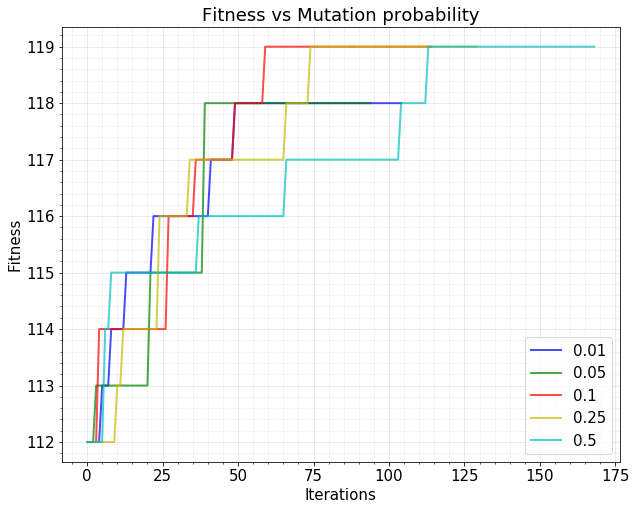

In [121]:
length = pd_GA_mutation.shape[0]
for i in range(0, length):
    plt.plot(pd_GA_mutation.iloc[i]['Fitness'],
             label= pd_GA_mutation.iloc[i]['Mutation probability'], alpha=0.7, linewidth = 2)
    plt.title('Fitness vs Mutation probability')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend(loc='lower right')
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
    plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
    
plt.savefig("N_Queens_opt_GA_mutation.png")
plt.show()

### MIMIC

#### pop size optimization

In [124]:
# mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=inf, curve=False, random_
# state=None, fast_mimic=False)

# set the max attemps to 55, max iteration to inf, init_state = None, curve = true, random seed = 56
# pop size is the variable
all_max_attemps = 55
pop_list = [50, 100, 200, 250, 500]
opt_MIMIC_pop = []
for pop in pop_list:
    MIMIC_state, MIMIC_fitness, MIMIC_curves = mlrose_hiive.mimic(problem, pop_size = pop, keep_pct=0.2,
                                        max_attempts = all_max_attemps, max_iters = np.inf,
                                        curve = True, random_state = random_seed)

    opt_MIMIC_pop.append(["MIMIC", MIMIC_fitness, MIMIC_state, pop, len(MIMIC_curves), MIMIC_curves])
#     print("the running progress is: " + str(int(mutation / mutation_prob_max * 100)) + "%", end = "\r")
    
pd_MIMIC_pop = pd.DataFrame(opt_MIMIC_pop, columns=['Algorithm', 'Best fitness', 'Best state',
                                             'Pop size', 'Iterations', 'Fitness'])  



In [125]:
pd_MIMIC_pop

,Algorithm,Best fitness,Best state,Pop size,Iterations,Fitness
0,MIMIC,111.0,"[12, 5, 1, 8, 14, 0, 13, 3, 6, 14, 7, 12, 2, 9...",50,56,"[111.0, 111.0, 111.0, 111.0, 111.0, 111.0, 111..."
1,MIMIC,113.0,"[15, 6, 11, 7, 12, 4, 13, 14, 14, 9, 15, 9, 0,...",100,57,"[111.0, 113.0, 113.0, 113.0, 113.0, 113.0, 113..."
2,MIMIC,116.0,"[15, 12, 7, 9, 0, 13, 5, 14, 8, 1, 12, 2, 10, ...",200,59,"[112.0, 113.0, 113.0, 116.0, 116.0, 116.0, 116..."
3,MIMIC,115.0,"[5, 9, 15, 10, 0, 3, 12, 4, 1, 13, 2, 11, 4, 8...",250,58,"[113.0, 113.0, 115.0, 115.0, 115.0, 115.0, 115..."
4,MIMIC,117.0,"[9, 2, 0, 13, 15, 5, 8, 10, 12, 3, 1, 10, 11, ...",500,63,"[112.0, 114.0, 114.0, 114.0, 114.0, 116.0, 116..."


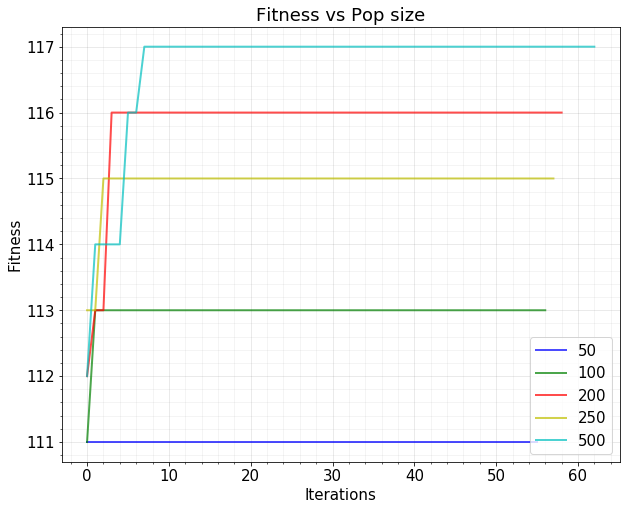

In [127]:
length = pd_MIMIC_pop.shape[0]
for i in range(0, length):
    plt.plot(pd_MIMIC_pop.iloc[i]['Fitness'],
             label= pd_MIMIC_pop.iloc[i]['Pop size'], alpha=0.7, linewidth = 2)
    plt.title('Fitness vs Pop size')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend(loc='lower right')
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
    plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
    
plt.savefig("N_Queens_opt_MIMIC_popsize.png")
plt.show()

####  keep percent optimization

In [133]:
# mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=inf, curve=False, random_
# state=None, fast_mimic=False)

# set the max attemps to 55, max iteration to inf, init_state = None, curve = true, random seed = 56
# mutation prob is the variable
all_max_attemps = 55
pct_list = [0.05, 0.1, 0.2, 0.3, 0.5]
opt_MIMIC_pct = []
for pct in pct_list:
    MIMIC_state, MIMIC_fitness, MIMIC_curves = mlrose_hiive.mimic(problem, pop_size = 200, keep_pct = pct,
                                        max_attempts = all_max_attemps, max_iters = np.inf,
                                        curve = True, random_state = random_seed)

    opt_MIMIC_pct.append(["MIMIC", MIMIC_fitness, MIMIC_state, pct, len(MIMIC_curves), MIMIC_curves])
#     print("the running progress is: " + str(int(mutation / mutation_prob_max * 100)) + "%", end = "\r")
    
pd_MIMIC_pct = pd.DataFrame(opt_MIMIC_pct, columns=['Algorithm', 'Best fitness', 'Best state',
                                             'Keep pct', 'Iterations', 'Fitness'])  



In [134]:
pd_MIMIC_pct

,Algorithm,Best fitness,Best state,Keep pct,Iterations,Fitness
0,MIMIC,1961.0,"[24, 62, 51, 31, 22, 55, 50, 20, 40, 34, 31, 3...",0.05,56,"[1961.0, 1961.0, 1961.0, 1961.0, 1961.0, 1961...."
1,MIMIC,1961.0,"[24, 62, 51, 31, 22, 55, 50, 20, 40, 34, 31, 3...",0.10,56,"[1961.0, 1961.0, 1961.0, 1961.0, 1961.0, 1961...."
2,MIMIC,1966.0,"[43, 63, 48, 35, 12, 12, 52, 58, 1, 37, 1, 3, ...",0.20,57,"[1963.0, 1966.0, 1966.0, 1966.0, 1966.0, 1966...."
3,MIMIC,1979.0,"[18, 33, 7, 60, 8, 60, 20, 30, 44, 11, 21, 3, ...",0.30,65,"[1972.0, 1972.0, 1972.0, 1972.0, 1975.0, 1976...."
4,MIMIC,1978.0,"[4, 63, 15, 3, 24, 14, 48, 36, 7, 51, 21, 9, 3...",0.50,76,"[1964.0, 1966.0, 1967.0, 1972.0, 1972.0, 1972...."


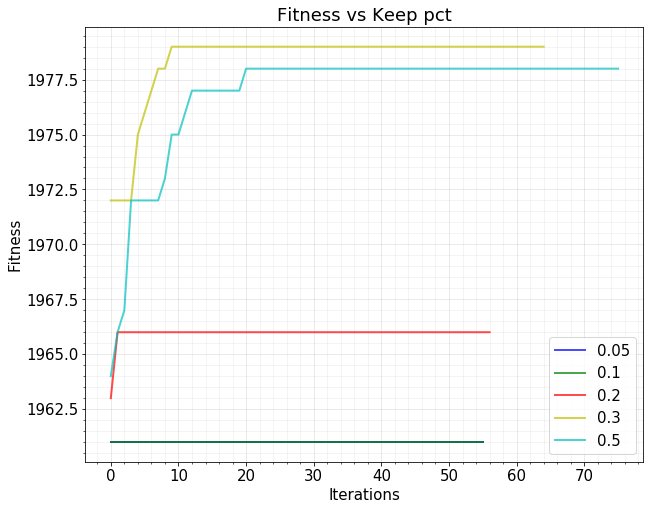

In [135]:
length = pd_MIMIC_pct.shape[0]
for i in range(0, length):
    plt.plot(pd_MIMIC_pct.iloc[i]['Fitness'],
             label= pd_MIMIC_pct.iloc[i]['Keep pct'], alpha=0.7, linewidth = 2)
    plt.title('Fitness vs Keep pct')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend(loc='lower right')
    plt.minorticks_on()
    plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
    plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
    
plt.savefig("N_Queens_opt_MIMIC_KeepPct.png")
plt.show()

# Comparison of all algorithms in more complex problem

### more complex problem generated

In [136]:
# This function is copied from MLRose Tutorial
# https://mlrose.readthedocs.io/en/stable/source/tutorial1.html  
size_Q = 64
def queeens_max(board):
    count = 0
    length = len(board)
    for i in range(0, length - 1):
        for j in range(i + 1, length):
            # calculate attahcing pairs
            distance = j - i
            if (board[j] != board[i]) and (board[j] != board[i] + distance) and (board[j] != board[i] - distance):
                # no attack
                count +=1

    return count
# we are dealing with a maximize problem
customized_fitness = mlrose_hiive.CustomFitness(queeens_max)
print(customized_fitness)
# calculate the theoretical numnber
max_number = 0
for i in range(0, size_Q):
    max_number += i
print(max_number)

problem = mlrose_hiive.DiscreteOpt(length = size_Q, fitness_fn = customized_fitness, 
                             maximize = True, max_val = size_Q)

attemp_min = 10
attemp_max = 120
attemp_step = 45

2016


In [137]:
all_result = []
for attemp in range(attemp_min, attemp_max, attemp_step):
    # RHC
    start_time = time.time()
    opt_RHC_state, opt_RHC_fitness, RHC_curve_vals = mlrose_hiive.random_hill_climb(problem, 
                                        max_attempts = attemp,
                                        max_iters = np.inf, restarts = 8, init_state = None,
                                        curve = True, random_state = random_seed)
    end_time = time.time()
    running_time = end_time - start_time
    all_result.append(["RHC", attemp, int(opt_RHC_fitness),opt_RHC_state, len(RHC_curve_vals), RHC_curve_vals, running_time])

    # Simulated annealing (SA)
    start_time = time.time()
    opt_SA_state, opt_SA_fitness, SA_curve_vals = mlrose_hiive.simulated_annealing(problem,
                                    schedule = mlrose_hiive.GeomDecay(),
                                    max_attempts = attemp,
                                    max_iters = np.inf, init_state = None,
                                    curve = True, random_state = random_seed)
    end_time = time.time()
    running_time = end_time - start_time
    all_result.append(["SA", attemp, int(opt_SA_fitness), opt_SA_state, len(SA_curve_vals), SA_curve_vals, running_time])

    # Genetic algorithm (GA)
    start_time = time.time()
    opt_GA_state, opt_GA_fitness, GA_curve_vals = mlrose_hiive.genetic_alg(problem, 
                                        pop_size = 200, mutation_prob = 0.1,
                                        max_attempts = attemp, max_iters = np.inf,
                                        curve = True, random_state = random_seed)
    end_time = time.time()
    running_time = end_time - start_time
    all_result.append(["GA", attemp, int(opt_GA_fitness), opt_GA_state, len(GA_curve_vals), GA_curve_vals, running_time])
    
    # MIMIC
    start_time = time.time()
    opt_MIMIC_state, opt_MIMIC_fitness, MIMIC_curve_vals = mlrose_hiive.mimic(problem, 
                                        pop_size = 200, keep_pct=0.3,
                                        max_attempts = attemp, max_iters = np.inf,
                                        curve = True, random_state = random_seed)
    end_time = time.time()
    running_time = end_time - start_time
    all_result.append(["MIMIC", attemp, int(opt_MIMIC_fitness),opt_MIMIC_state, len(MIMIC_curve_vals), MIMIC_curve_vals, running_time])
    
    print("the running progress is: " + str(int(attemp / attemp_max * 100)) + "%", end = "\r")

    


In [138]:
# converted into pandas dataframe
all_pandas = pd.DataFrame(all_result, columns=['Algorithm', 'Max attempts', 'Best fitness', 'Best states', 'Iterations', 'Fitness details', 'Running time'])

### Plot and comparison

### performance comparison

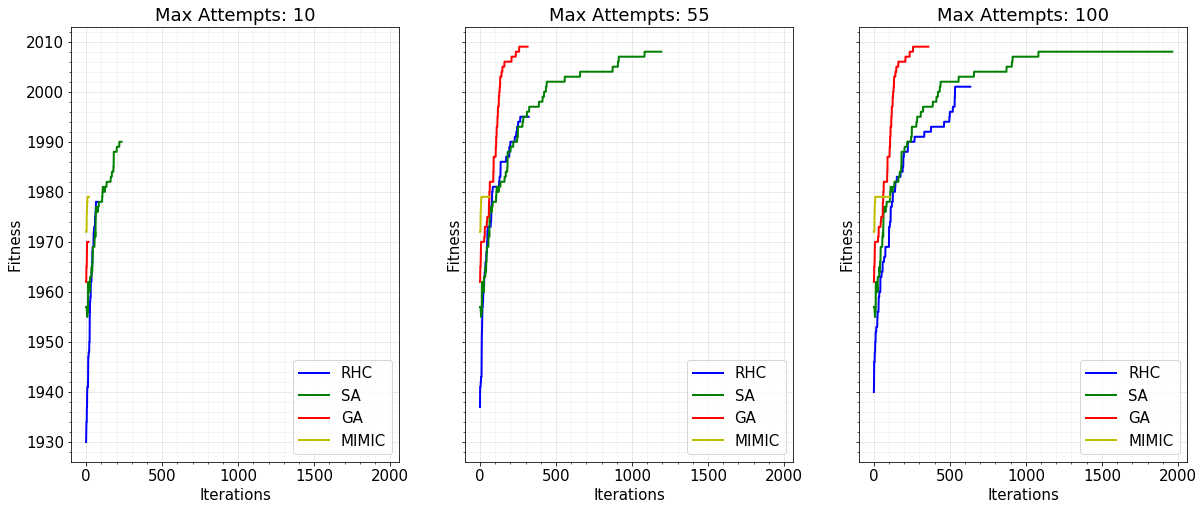

In [139]:
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgryckm')

fig, axis = plt.subplots(1,3, figsize=(20, 8), sharex=True, sharey=True)
axis_ravel = axis.ravel()
for ax, max_attemps in zip(axis_ravel, range(attemp_min, attemp_max, attemp_step)):
    attemps = all_pandas[all_pandas['Max attempts']== max_attemps]
    for i in range(0, attemps.shape[0]):
        ax.plot(attemps.iloc[i]['Fitness details'], label = attemps.iloc[i]['Algorithm'], linewidth=2)
        ax.set_title('Max Attempts: '+str(max_attemps))
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Fitness')
        ax.minorticks_on()
        ax.legend(loc='lower right')
        ax.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
        ax.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
fig.savefig("N_Queens_opt_performance.png")

### time comparison

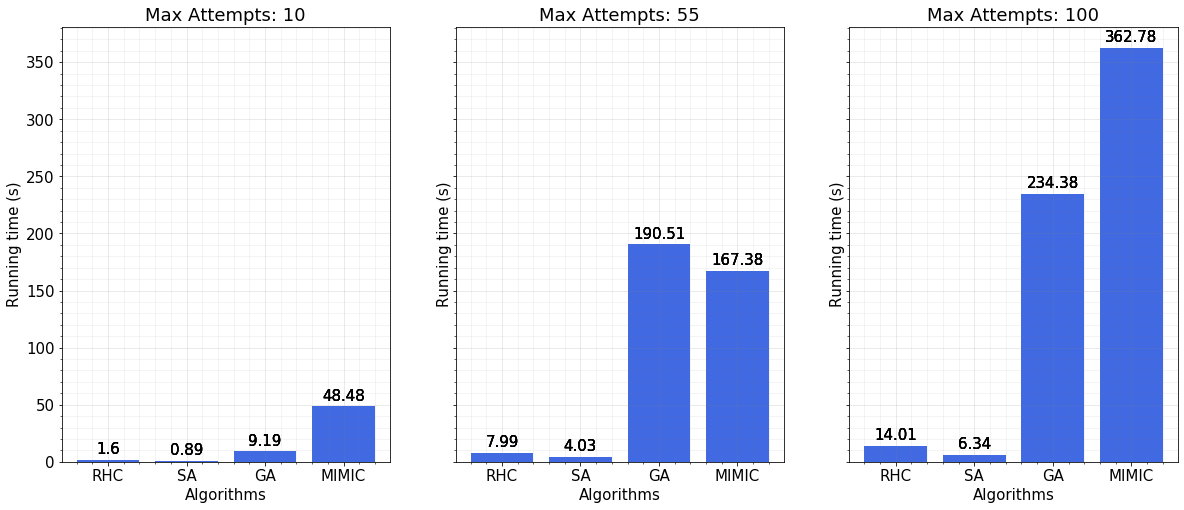

In [140]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
fig, axis = plt.subplots(1,3, figsize=(20, 8), sharex=True, sharey=True)

axis_ravel = axis.ravel()
for ax, max_attemps in zip(axis_ravel, range(attemp_min, attemp_max, attemp_step)):
    attemps = all_pandas[all_pandas['Max attempts']== max_attemps]
    for i in range(0, attemps.shape[0]):
        runtime = [round(num, 2) for num in attemps['Running time']]
        rects = ax.bar(attemps['Algorithm'],runtime, linewidth=2, color = "royalblue")
        ax.set_title('Max Attempts: '+str(max_attemps))
        ax.set_xlabel('Algorithms')
        ax.set_ylabel('Running time (s)')
#         ax.set_yscale('log')
        ax.minorticks_on()
#         ax.legend(loc='lower right')
        ax.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
        ax.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
        autolabel(rects)
fig.savefig("N_Queens_opt_time.png")

# Comparison of all algorithms in N queens

### more complex problem generated

In [146]:
# This function is copied from MLRose Tutorial
# https://mlrose.readthedocs.io/en/stable/source/tutorial1.html  
size_Q = [8, 32, 64]
def queeens_max(board):
    count = 0
    length = len(board)
    for i in range(0, length - 1):
        for j in range(i + 1, length):
            # calculate attahcing pairs
            distance = j - i
            if (board[j] != board[i]) and (board[j] != board[i] + distance) and (board[j] != board[i] - distance):
                # no attack
                count +=1

    return count
# we are dealing with a maximize problem
customized_fitness = mlrose_hiive.CustomFitness(queeens_max)
print(customized_fitness)
# calculate the theoretical numnber
max_number_list = []
for i in range(0, len(size_Q)):
    max_number = 0
    for j in range(0, size_Q[i]):
        max_number += j
    max_number_list.append(max_number)
print(max_number_list)

problem1 = mlrose_hiive.DiscreteOpt(length = size_Q[0], fitness_fn = customized_fitness, 
                             maximize = True, max_val = size_Q[0])

problem2 = mlrose_hiive.DiscreteOpt(length = size_Q[1], fitness_fn = customized_fitness, 
                             maximize = True, max_val = size_Q[1])

problem3 = mlrose_hiive.DiscreteOpt(length = size_Q[2], fitness_fn = customized_fitness, 
                             maximize = True, max_val = size_Q[2])

attemp_min = 10
attemp_max = 120
attemp_step = 45

[28, 496, 2016]


In [160]:
all_result = []
# RHC - 8Q
start_time = time.time()
opt_RHC_state, opt_RHC_fitness, RHC_curve_vals = mlrose_hiive.random_hill_climb(problem1, 
                                    max_attempts = 55,
                                    max_iters = np.inf, restarts = 8, init_state = None,
                                    curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["RHC", "8Queen", int(opt_RHC_fitness),opt_RHC_state, len(RHC_curve_vals), RHC_curve_vals, running_time])
# RHC - 32Q
start_time = time.time()
opt_RHC_state, opt_RHC_fitness, RHC_curve_vals = mlrose_hiive.random_hill_climb(problem2, 
                                    max_attempts = 55,
                                    max_iters = np.inf, restarts = 8, init_state = None,
                                    curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["RHC", "32Queen", int(opt_RHC_fitness),opt_RHC_state, len(RHC_curve_vals), RHC_curve_vals, running_time])
# RHC - 64Q
start_time = time.time()
opt_RHC_state, opt_RHC_fitness, RHC_curve_vals = mlrose_hiive.random_hill_climb(problem3, 
                                    max_attempts = 55,
                                    max_iters = np.inf, restarts = 8, init_state = None,
                                    curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["RHC", "64Queen", int(opt_RHC_fitness),opt_RHC_state, len(RHC_curve_vals), RHC_curve_vals, running_time])





# Simulated annealing (SA) - 8Q
start_time = time.time()
opt_SA_state, opt_SA_fitness, SA_curve_vals = mlrose_hiive.simulated_annealing(problem1,
                                schedule = mlrose_hiive.GeomDecay(),
                                max_attempts = 55,
                                max_iters = np.inf, init_state = None,
                                curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["SA", "8Queen", int(opt_SA_fitness), opt_SA_state, len(SA_curve_vals), SA_curve_vals, running_time])


# Simulated annealing (SA) - 32Q
start_time = time.time()
opt_SA_state, opt_SA_fitness, SA_curve_vals = mlrose_hiive.simulated_annealing(problem2,
                                schedule = mlrose_hiive.GeomDecay(),
                                max_attempts = 55,
                                max_iters = np.inf, init_state = None,
                                curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["SA", "32Queen" , int(opt_SA_fitness), opt_SA_state, len(SA_curve_vals), SA_curve_vals, running_time])

# Simulated annealing (SA) - 64Q
start_time = time.time()
opt_SA_state, opt_SA_fitness, SA_curve_vals = mlrose_hiive.simulated_annealing(problem3,
                                schedule = mlrose_hiive.GeomDecay(),
                                max_attempts = 55,
                                max_iters = np.inf, init_state = None,
                                curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["SA", "64Queen", int(opt_SA_fitness), opt_SA_state, len(SA_curve_vals), SA_curve_vals, running_time])






# Genetic algorithm (GA) - 8Q
start_time = time.time()
opt_GA_state, opt_GA_fitness, GA_curve_vals = mlrose_hiive.genetic_alg(problem1, 
                                    pop_size = 200, mutation_prob = 0.1,
                                    max_attempts = 55, max_iters = np.inf,
                                    curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["GA", "8Queen", int(opt_GA_fitness), opt_GA_state, len(GA_curve_vals), GA_curve_vals, running_time])

# Genetic algorithm (GA) - 32Q
start_time = time.time()
opt_GA_state, opt_GA_fitness, GA_curve_vals = mlrose_hiive.genetic_alg(problem2, 
                                    pop_size = 200, mutation_prob = 0.1,
                                    max_attempts = 55, max_iters = np.inf,
                                    curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["GA", "32Queen", int(opt_GA_fitness), opt_GA_state, len(GA_curve_vals), GA_curve_vals, running_time])

# Genetic algorithm (GA) - 64Q
start_time = time.time()
opt_GA_state, opt_GA_fitness, GA_curve_vals = mlrose_hiive.genetic_alg(problem3, 
                                    pop_size = 200, mutation_prob = 0.1,
                                    max_attempts = 55, max_iters = np.inf,
                                    curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["GA", "64Queen", int(opt_GA_fitness), opt_GA_state, len(GA_curve_vals), GA_curve_vals, running_time])




 
# MIMIC - 8Q
start_time = time.time()
opt_MIMIC_state, opt_MIMIC_fitness, MIMIC_curve_vals = mlrose_hiive.mimic(problem1, 
                                    pop_size = 200, keep_pct=0.3,
                                    max_attempts = 55, max_iters = np.inf,
                                    curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["MIMIC", "8Queen", int(opt_MIMIC_fitness),opt_MIMIC_state, len(MIMIC_curve_vals), MIMIC_curve_vals, running_time])

# MIMIC - 32Q
start_time = time.time()
opt_MIMIC_state, opt_MIMIC_fitness, MIMIC_curve_vals = mlrose_hiive.mimic(problem2, 
                                    pop_size = 200, keep_pct=0.3,
                                    max_attempts = 55, max_iters = np.inf,
                                    curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["MIMIC", "32Queen", int(opt_MIMIC_fitness),opt_MIMIC_state, len(MIMIC_curve_vals), MIMIC_curve_vals, running_time])




# MIMIC - 64Q
start_time = time.time()
opt_MIMIC_state, opt_MIMIC_fitness, MIMIC_curve_vals = mlrose_hiive.mimic(problem3, 
                                    pop_size = 200, keep_pct=0.3,
                                    max_attempts = 55, max_iters = np.inf,
                                    curve = True, random_state = random_seed)
end_time = time.time()
running_time = end_time - start_time
all_result.append(["MIMIC", "64Queen", int(opt_MIMIC_fitness),opt_MIMIC_state, len(MIMIC_curve_vals), MIMIC_curve_vals, running_time])





In [163]:
# converted into pandas dataframe
all_pandas = pd.DataFrame(all_result, columns=['Algorithm', 'Queen Number', 'Best fitness', 'Best states', 'Iterations', 'Fitness details', 'Running time'])

In [164]:
all_pandas 

,Algorithm,Queen Number,Best fitness,Best states,Iterations,Fitness details,Running time
0,RHC,8Queen,28,"[2, 5, 1, 4, 7, 0, 6, 3]",78,"[22.0, 23.0, 23.0, 23.0, 23.0, 23.0, 24.0, 24....",0.066344
1,RHC,32Queen,491,"[27, 30, 3, 8, 2, 29, 13, 6, 4, 21, 18, 28, 23...",355,"[463.0, 463.0, 463.0, 463.0, 464.0, 464.0, 464...",1.294813
2,RHC,64Queen,1995,"[11, 2, 63, 27, 19, 51, 43, 52, 21, 30, 51, 31...",321,"[1937.0, 1941.0, 1941.0, 1941.0, 1941.0, 1942....",7.387829
3,SA,8Queen,27,"[6, 0, 2, 5, 1, 4, 7, 3]",211,"[23.0, 23.0, 23.0, 21.0, 22.0, 23.0, 23.0, 23....",0.019095
4,SA,32Queen,491,"[21, 12, 10, 0, 28, 23, 26, 29, 18, 16, 27, 20...",562,"[466.0, 469.0, 469.0, 471.0, 471.0, 471.0, 472...",0.447934
5,SA,64Queen,2008,"[1, 57, 16, 31, 21, 12, 46, 13, 41, 59, 9, 23,...",1193,"[1957.0, 1957.0, 1957.0, 1957.0, 1957.0, 1956....",3.611265
6,GA,8Queen,28,"[3, 6, 2, 7, 1, 4, 0, 5]",84,"[25.0, 25.0, 25.0, 26.0, 27.0, 27.0, 27.0, 27....",1.587725
7,GA,32Queen,493,"[31, 12, 16, 5, 17, 9, 0, 2, 30, 26, 9, 18, 28...",207,"[477.0, 477.0, 477.0, 477.0, 477.0, 481.0, 481...",30.484887
8,GA,64Queen,2009,"[49, 46, 11, 22, 8, 22, 17, 13, 42, 52, 54, 42...",314,"[1962.0, 1962.0, 1965.0, 1965.0, 1965.0, 1967....",194.105736
9,MIMIC,8Queen,26,"[7, 2, 5, 7, 1, 3, 0, 6]",58,"[25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26....",2.325993


### Plot and comparison

In [161]:
question_set = ["8Queen", "32Queen", "64Queen"]

### performance comparison

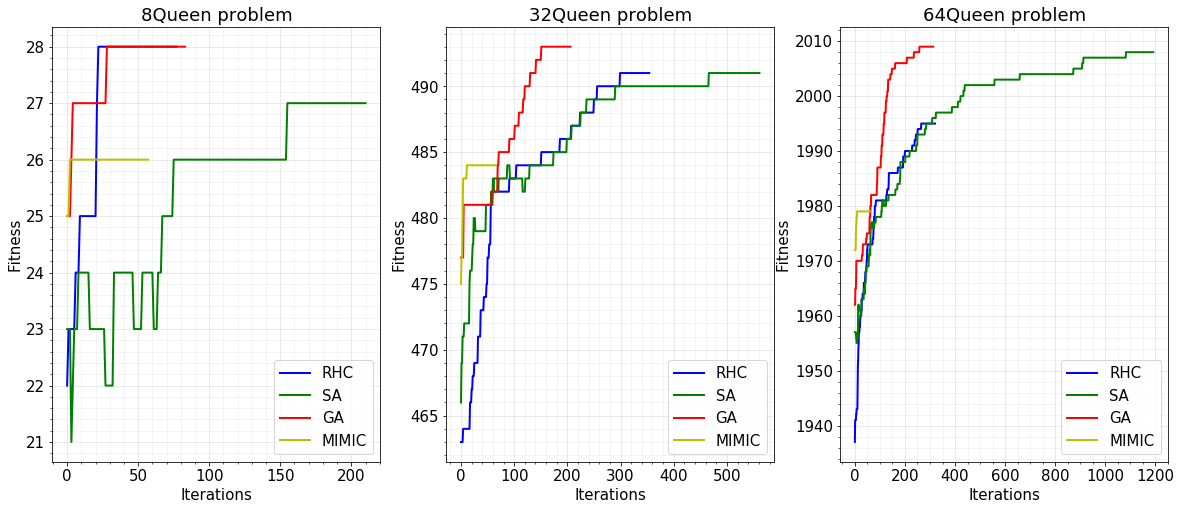

In [165]:
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgryckm')

fig, axis = plt.subplots(1,3, figsize=(20, 8))
axis_ravel = axis.ravel()
for ax, question in zip(axis_ravel, range(0, len(question_set))):
    attemps = all_pandas[all_pandas['Queen Number']== question_set[question]]
    for i in range(0, attemps.shape[0]):
        ax.plot(attemps.iloc[i]['Fitness details'], label = attemps.iloc[i]['Algorithm'], linewidth=2)
        ax.set_title(question_set[question] + " problem")
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Fitness')
        ax.minorticks_on()
        ax.legend(loc='lower right')
        ax.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
        ax.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
fig.savefig("N_Queens_performance_complexity.png")

### time comparison

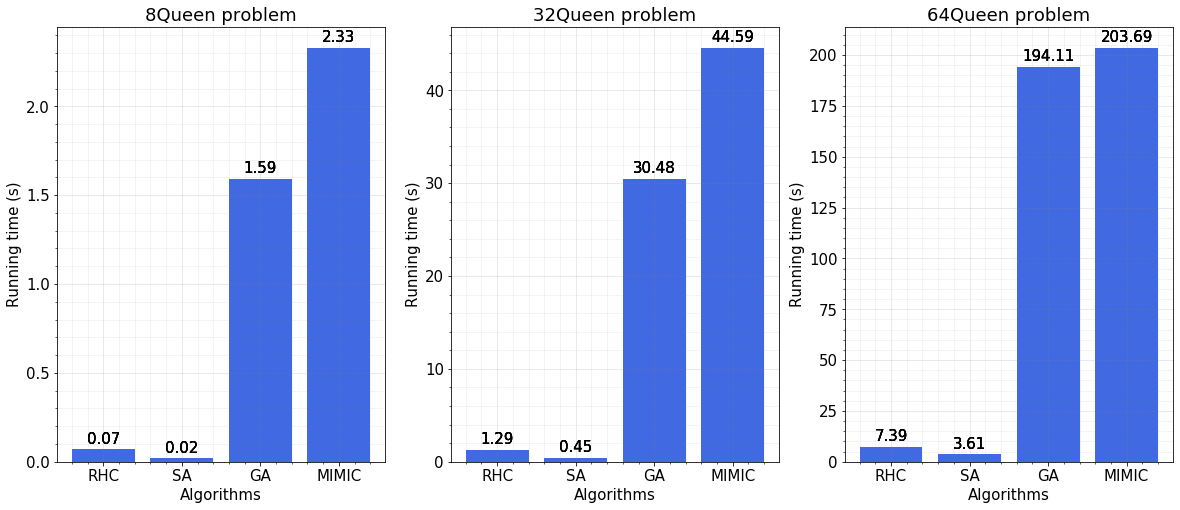

In [167]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
fig, axis = plt.subplots(1,3, figsize=(20, 8), sharex=True)

axis_ravel = axis.ravel()
for ax, question in zip(axis_ravel, range(0, len(question_set))):
    attemps = all_pandas[all_pandas['Queen Number']== question_set[question]]
    for i in range(0, attemps.shape[0]):
        runtime = [round(num, 2) for num in attemps['Running time']]
        rects = ax.bar(attemps['Algorithm'],runtime, linewidth=2, color = "royalblue")
        ax.set_title(question_set[question] + " problem")
        ax.set_xlabel('Algorithms')
        ax.set_ylabel('Running time (s)')
#         ax.set_yscale('log')
        ax.minorticks_on()
#         ax.legend(loc='lower right')
        ax.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.2)
        ax.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.1)
        autolabel(rects)
fig.savefig("N_Queens_time_complexity.png")